### Perform necessary package installations

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn
!pip install xgboost
!pip install heatmapz

Requirement already up-to-date: scikit-learn in c:\users\ranganath\appdata\local\conda\conda\envs\autoinsurance\lib\site-packages (0.24.1)


### First we clean our data by dealing with empty elements and repeating rows

In [2]:
import numpy as np  # linear algebra
import pandas as pd # handling data

### Data Description

In [3]:
# Explain the dataset colomns here

### Preprocessing

In [4]:
# first import all necessary libraries
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
# Need to set the default settings for seaborn as it is no longer imported directly
sns.set()

In [6]:
# Let us import the data into a pandas dataframe for inspection

df = pd.read_csv("train_auto.csv")
df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [7]:
# Check the dimensions of our data
df.shape

(8161, 26)

We have thus 8161 rows with 26 colomns in our training dataset.

In [8]:
# let's list all the columns
columns = list(df.columns)
columns

['INDEX',
 'TARGET_FLAG',
 'TARGET_AMT',
 'KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'INCOME',
 'PARENT1',
 'HOME_VAL',
 'MSTATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'TRAVTIME',
 'CAR_USE',
 'BLUEBOOK',
 'TIF',
 'CAR_TYPE',
 'RED_CAR',
 'OLDCLAIM',
 'CLM_FREQ',
 'REVOKED',
 'MVR_PTS',
 'CAR_AGE',
 'URBANICITY']

In [9]:
# We can drop drop these columns as they are not concerning us
DROP_COLUMNS = ['INDEX','TARGET_AMT']

df = df.drop(DROP_COLUMNS, axis=1)

# The target column
TARGET = 'TARGET_FLAG'

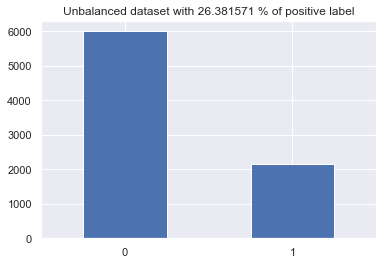

In [10]:
df[TARGET].value_counts().plot(kind='bar', rot=0)
plt.title('Unbalanced dataset with {:0f} % of positive label'.format(100*df[TARGET].mean()))
plt.show()

The class imbalance is not too bad so let us skip performing any corrective action at this stage.

In [11]:
# we now describe the properties of this dataframe like column datatype etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   KIDSDRIV     8161 non-null   int64  
 2   AGE          8155 non-null   float64
 3   HOMEKIDS     8161 non-null   int64  
 4   YOJ          7707 non-null   float64
 5   INCOME       7716 non-null   object 
 6   PARENT1      8161 non-null   object 
 7   HOME_VAL     7697 non-null   object 
 8   MSTATUS      8161 non-null   object 
 9   SEX          8161 non-null   object 
 10  EDUCATION    8161 non-null   object 
 11  JOB          7635 non-null   object 
 12  TRAVTIME     8161 non-null   int64  
 13  CAR_USE      8161 non-null   object 
 14  BLUEBOOK     8161 non-null   object 
 15  TIF          8161 non-null   int64  
 16  CAR_TYPE     8161 non-null   object 
 17  RED_CAR      8161 non-null   object 
 18  OLDCLAIM     8161 non-null   object 
 19  CLM_FR

Let us store the categorical and numerical colomn names in seperate lists as the analysis will differ according to the type.
Type object means it is categorical else it is numerical.

In [12]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'URBANICITY']
Numerical variables:  ['TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']


We see that the target variable 'TARGET_FLAG' is categorised as a numerical quantity. In reality we are dealing with a classification problem and thus the target variable should be categorical.

Let us add this colomn to the categorical category.

In [13]:
cats.extend(['TARGET_FLAG'])
nums.remove('TARGET_FLAG')

print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'URBANICITY', 'TARGET_FLAG']
Numerical variables:  ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']


In [14]:
# Checking the heads for numerical colomns to verify
df[nums].head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
0,0,60.0,0,11.0,14,11,2,3,18.0
1,0,43.0,0,11.0,22,1,0,0,1.0
2,0,35.0,1,10.0,5,4,2,3,10.0
3,0,51.0,0,14.0,32,7,0,0,6.0
4,0,50.0,0,NaN,36,1,2,3,17.0


The numerical colomns seem to be alright.

Now let us check the categorical colomns


In [15]:
# Checking the heads for categorical colomns to verify
df[cats].head()

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY,TARGET_FLAG
0,"$67,349",No,$0,z_No,M,PhD,Professional,Private,"$14,230",Minivan,yes,"$4,461",No,Highly Urban/ Urban,0
1,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,Commercial,"$14,940",Minivan,yes,$0,No,Highly Urban/ Urban,0
2,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,Private,"$4,010",z_SUV,no,"$38,690",No,Highly Urban/ Urban,0
3,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,Private,"$15,440",Minivan,yes,$0,No,Highly Urban/ Urban,0
4,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,Private,"$18,000",z_SUV,no,"$19,217",Yes,Highly Urban/ Urban,0


Checking the categorical variables we notice certain anomalies.
The colomns of 'INCOME', 'HOME_VAL', 'BLUEBOOK' and 'OLDCLAIM' are not objects but numbers.

Normally if multiple currencies exist we need to convert all different currencies to one reference (usually Dollar) but in our case we are only dealing with dollar hence we just need to convert these objects with '$' sign into numbers(float) by removing the symbol.

In [16]:
# removing the dollar symbol in the anomalous colomns
df[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']] = df[['INCOME',
                                                      'HOME_VAL',
                                                      'BLUEBOOK',
                                                      'OLDCLAIM']].replace('[\$,]', '', regex=True).astype(float)

Let us verify that our procedure has worked

In [17]:
df[cats].head()

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY,TARGET_FLAG
0,67349.0,No,0.0,z_No,M,PhD,Professional,Private,14230.0,Minivan,yes,4461.0,No,Highly Urban/ Urban,0
1,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,Commercial,14940.0,Minivan,yes,0.0,No,Highly Urban/ Urban,0
2,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,Private,4010.0,z_SUV,no,38690.0,No,Highly Urban/ Urban,0
3,NaN,No,306251.0,Yes,M,<High School,z_Blue Collar,Private,15440.0,Minivan,yes,0.0,No,Highly Urban/ Urban,0
4,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,Private,18000.0,z_SUV,no,19217.0,Yes,Highly Urban/ Urban,0


Indeed it has worked, so let us now add these variables to the numerical variables and remove them from the categorical section.

In [18]:
# cylinders and model_year also seems to be categorical so lets update the lists

nums.extend(['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM'])
cats.remove('INCOME')
cats.remove('HOME_VAL')
cats.remove('BLUEBOOK')
cats.remove('OLDCLAIM')

print('The new variable classification is: \n ')
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')



The new variable classification is: 
 
Categorical variables:  ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY', 'TARGET_FLAG']
Numerical variables:  ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']


In [19]:
df[nums].head(6)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,0,60.0,0,11.0,14,11,2,3,18.0,67349.0,0.0,14230.0,4461.0
1,0,43.0,0,11.0,22,1,0,0,1.0,91449.0,257252.0,14940.0,0.0
2,0,35.0,1,10.0,5,4,2,3,10.0,16039.0,124191.0,4010.0,38690.0
3,0,51.0,0,14.0,32,7,0,0,6.0,NaN,306251.0,15440.0,0.0
4,0,50.0,0,NaN,36,1,2,3,17.0,114986.0,243925.0,18000.0,19217.0
5,0,34.0,1,12.0,46,1,0,0,7.0,125301.0,0.0,17430.0,0.0


In [20]:
# let's inspect how many unique values are there in each column.
df.nunique(axis=0)

TARGET_FLAG       2
KIDSDRIV          5
AGE              60
HOMEKIDS          6
YOJ              21
INCOME         6612
PARENT1           2
HOME_VAL       5106
MSTATUS           2
SEX               2
EDUCATION         5
JOB               8
TRAVTIME         97
CAR_USE           2
BLUEBOOK       2789
TIF              23
CAR_TYPE          6
RED_CAR           2
OLDCLAIM       2857
CLM_FREQ          6
REVOKED           2
MVR_PTS          13
CAR_AGE          30
URBANICITY        2
dtype: int64

We can make the colomns with less unique values as categorical variables but should keep in mind that if we encounter new values for these colomns during testing or deployment that will give errors.

So for now let us stick with these colomn categories.

In [21]:
# check for `nans` in each column
df.isna().sum()

TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

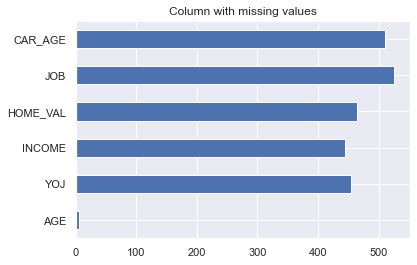

In [22]:
# Visualing the missing values

is_column_with_na = df.isna().sum()
is_column_with_na[is_column_with_na != 0].plot.barh()
plt.title('Column with missing values')
plt.show()



In [23]:
print("The percentage of rows with missing values is: ", 100*len(df[df.isnull().any(axis=1)])/len(df))

The percentage of rows with missing values is:  25.928195074133072


### First approach - delete rows with missing values

Here we have around 26 percent rows missing one or more values. 
This is 1/4th of the data and not an inconsiderable amount.

Hence, for this naive approach we shall eliminate these rows and have a look at the results.
If the data is still sufficient and the model is able to satisfy our performance criteria then we can stick with this.

On the other hand, if we find that our model is not performing up to standards with the cropped data, then we might need to add more data points or consider other data imputing techniques to fill missing values (like mean for example). 

In [24]:
# for now remove all nan rows 
df = df[~df.isnull().any(axis=1)]
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)
df.shape

(6045, 24)

In [25]:
# check for `nans` in each column
df.isna().sum()

TARGET_FLAG    0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

Now we have no rows with missing values.

Next we check for duplicate rows and eliminate them

In [26]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df.duplicated().sum()}')

# drop duplicate rows if any
df = df[~df.duplicated()]
df.shape

total duplicate rows: 0


(6045, 24)

In [27]:
# before we move ahead it's a good practice to group all variables together having same type.
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY,...,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban,...,11.0,14,11,2,3,18.0,67349.0,0.0,14230.0,4461.0
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban,...,11.0,22,1,0,0,1.0,91449.0,257252.0,14940.0,0.0
2,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban,...,10.0,5,4,2,3,10.0,16039.0,124191.0,4010.0,38690.0
3,Yes,z_No,z_F,Bachelors,z_Blue Collar,Commercial,Sports Car,no,No,Highly Urban/ Urban,...,12.0,46,1,0,0,7.0,125301.0,0.0,17430.0,0.0
4,No,z_No,z_F,Bachelors,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban,...,10.0,34,1,0,0,1.0,62978.0,0.0,11200.0,0.0


In [28]:
# Display all the categorical variables
print(f'categorical variables:  {cats}')

categorical variables:  ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY', 'TARGET_FLAG']


We will first slice out the categorical columns from original dataframe and then do analysis on it keeping the original data untou-ched, and at the end incorporate needed changes in our original dataframe.

In [29]:
df_cat = df.loc[:, 'PARENT1':'TARGET_FLAG']
df_cat.head()

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY,TARGET_FLAG
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban,0
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban,0
2,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban,0
3,Yes,z_No,z_F,Bachelors,z_Blue Collar,Commercial,Sports Car,no,No,Highly Urban/ Urban,1
4,No,z_No,z_F,Bachelors,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban,1


We will remove all extra spaces from each string, otherwise the same string with different spacings will be treated as different categories which should not be the case.

In [30]:
# remove extra spaces if any
for col in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

In [31]:
for i in cats:
    print(f"categories in {i}: {pd.unique(df_cat[i])}")

categories in PARENT1: ['No' 'Yes']
categories in MSTATUS: ['z_No' 'Yes']
categories in SEX: ['M' 'z_F']
categories in EDUCATION: ['PhD' 'z_High School' 'Bachelors' 'Masters' '<High School']
categories in JOB: ['Professional' 'z_Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker'
 'Doctor' 'Student']
categories in CAR_USE: ['Private' 'Commercial']
categories in CAR_TYPE: ['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Pickup' 'Panel Truck']
categories in RED_CAR: ['yes' 'no']
categories in REVOKED: ['No' 'Yes']
categories in URBANICITY: ['Highly Urban/ Urban' 'z_Highly Rural/ Rural']
categories in TARGET_FLAG: [0 1]


In [32]:
num_rows, num_cols = df.shape # Noting number of rows and columns of final data

We have our cleaned dataframe, let us write this to a new excel file

In [33]:
# save this cleaned df to csv
df.to_csv('train_cleaned.csv', index=False)

In the next section we shall perform an exploratory data analysis on this cleaned dataset. (EDA.ipynb)